In [1]:
import pandas as pd

In [17]:
df=pd.read_csv("exchange_rate.csv",parse_dates=['date'], index_col='date')

In [19]:
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [21]:
df.columns

Index(['Ex_rate'], dtype='object')

In [7]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [11]:
df[df.duplicated()]

,date,Ex_rate


In [13]:
import matplotlib.pyplot as plt

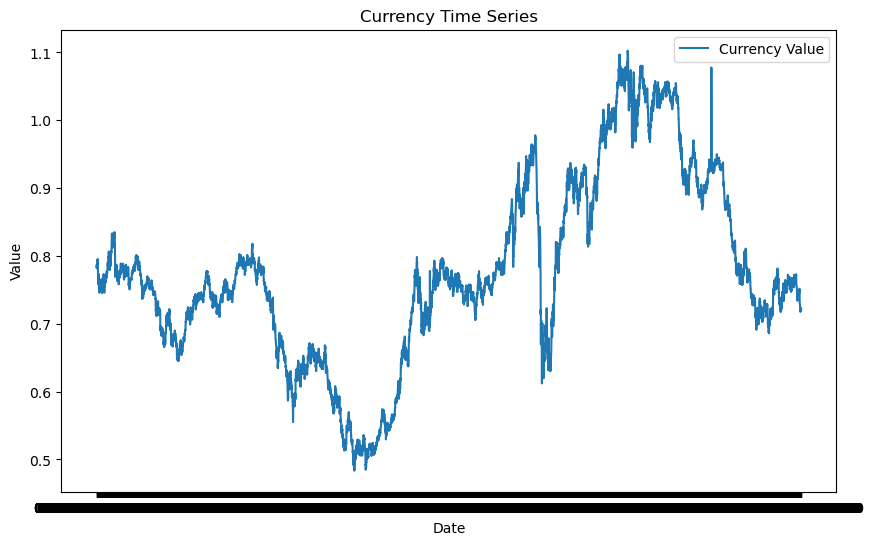

In [25]:
# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Currency Value')
plt.title('Currency Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [27]:
df.corr(numeric_only=True)

,Ex_rate
Ex_rate,1.0


In [29]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt

In [33]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


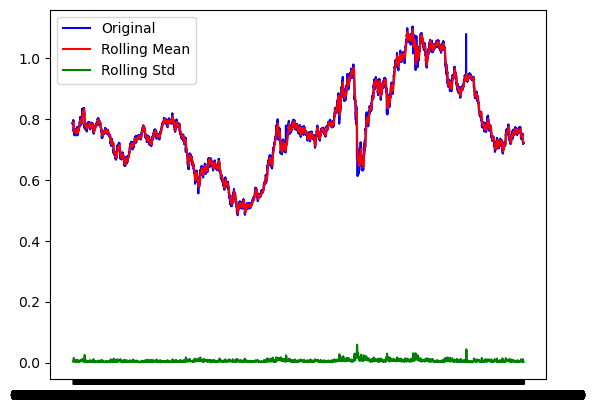

In [37]:
test_stationarity(df['Ex_rate'])

In [ ]:
#The Dickey-Fuller test is used to check for stationarity in a time series, such as an exchange rate (ex_rate) data. Here's an inference from the given summary:
#1)Test Statistic (-1.664994):
#The test statistic is compared to the critical values to determine if the null hypothesis (non-stationarity) can be rejected.
#2)Critical Values:
#At a 1% level of significance, the critical value is -3.431212.
#At a 5% level of significance, it is -2.861921.
#At a 10% level of significance, it is -2.566973.
#Since the test statistic (-1.664994) is higher than all the critical values, we fail to reject the null hypothesis.
#p-value (0.449233):
#The p-value is much greater than typical significance levels (0.01, 0.05, or 0.1), further indicating that the null hypothesis cannot be rejected.
#The p-value is 0.449233, which is much greater than 0.05.
#A p-value > 0.05 indicates that the null hypothesis of non-stationarity cannot be rejected. Hence, the series is non-stationary.

In [ ]:
#Inference:
#The given time series (ex_rate) is non-stationary at all levels of significance.
#This implies that the series has a time-dependent structure (e.g., trends or seasonality) and is not mean-reverting.
#To make the series stationary, consider applying transformations such as:
#Differencing: Subtracting the previous value from the current value.
#Logarithmic Transformation: Taking the log of the values to stabilize variance.
#Detrending: Removing any trend component.

In [41]:
df['Ex_rate_Diff']= df['Ex_rate']-df['Ex_rate'].shift(12)

In [43]:
df

,Ex_rate,Ex_rate_Diff
date,,
01-01-1990 00:00,0.785500,NaN
02-01-1990 00:00,0.781800,NaN
03-01-1990 00:00,0.786700,NaN
04-01-1990 00:00,0.786000,NaN
05-01-1990 00:00,0.784900,NaN
...,...,...
06-10-2010 00:00,0.718494,-0.012073
07-10-2010 00:00,0.721839,-0.007875
08-10-2010 00:00,0.723197,-0.006517


In [45]:
#dropping nan values from 'ex_rate_diff'
df.dropna()

,Ex_rate,Ex_rate_Diff
date,,
13-01-1990 00:00,0.793500,0.008000
14-01-1990 00:00,0.795400,0.013600
15-01-1990 00:00,0.775100,-0.011600
16-01-1990 00:00,0.762200,-0.023800
17-01-1990 00:00,0.758300,-0.026600
...,...,...
06-10-2010 00:00,0.718494,-0.012073
07-10-2010 00:00,0.721839,-0.007875
08-10-2010 00:00,0.723197,-0.006517


In [57]:
print("NaN count:", df['Ex_rate_Diff'].isna().sum())
print("Positive infinity count:", (df['Ex_rate_Diff'] == float('inf')).sum())
print("Negative infinity count:", (df['Ex_rate_Diff'] == float('-inf')).sum())


NaN count: 12
Positive infinity count: 0
Negative infinity count: 0


In [59]:
df.dropna(subset=['Ex_rate_Diff'], inplace=True)


In [ ]:
The results from the Augmented Dickey-Fuller (ADF) Test indicate that your Ex_rate column is non-stationary. Here's why:

Interpretation of ADF Test Results
Test Statistic:

Your test statistic is -1.664994.
To confirm stationarity, this value must be less than the critical values at any significance level (e.g., -3.431 at 1%, -2.861 at 5%, or -2.567 at 10%).
Since -1.664994 is greater than these critical values, the series is not stationary.
p-value:

The p-value is 0.449233, which is much greater than 0.05.
A p-value > 0.05 indicates that the null hypothesis of non-stationarity cannot be rejected. Hence, the series is non-stationary.

Results of Dickey-Fuller Test :

Test Statistic                -1.056518e+01
p-value                        7.549185e-19
#Lags Used                     3.600000e+01
Number of Observations Used    7.539000e+03
Critical Value (1%)           -3.431218e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


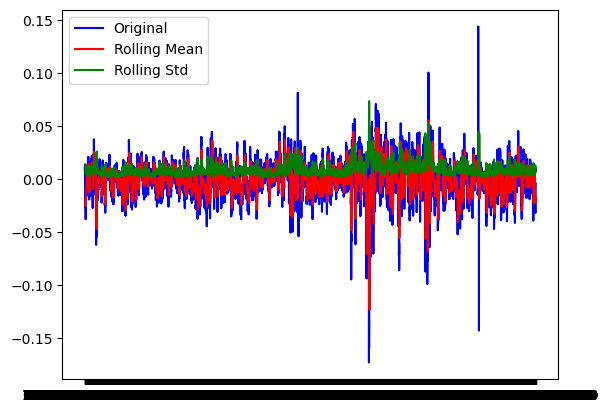

In [61]:
test_stationarity(df['Ex_rate_Diff'])

In [ ]:
#Interpretation of ADF Test Results
#Test Statistic:
#Your test statistic is -10.56518, which is much lower than all the critical values at the 1%, 5%, and 10% significance levels (e.g., -3.431, -2.861, and -2.567).
#This confirms that the series is stationary.
#p-value:
#The p-value is 7.549185e-19, which is effectively 0 and far below the significance threshold of 0.05.
#This means we reject the null hypothesis of non-stationarity, confirming that the series is stationary.
#Stationarity Confirmed:
#The differenced series can now be used to proceed with further analysis and modeling.

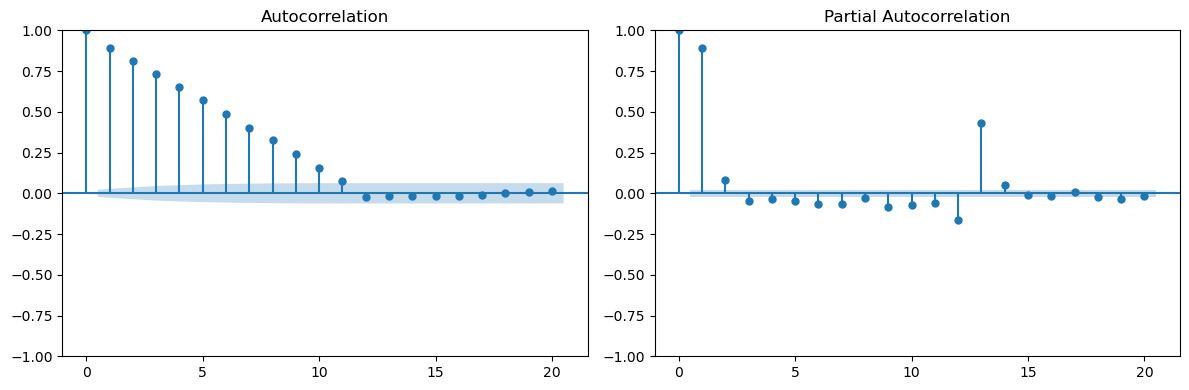

In [69]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df['Ex_rate_Diff'], lags=20, ax=axes[0])
smt.graphics.plot_pacf(df['Ex_rate_Diff'], lags=20, ax=axes[1])
plt.tight_layout()

In [ ]:
#This visualization contains two plots: the Autocorrelation Function (ACF) plot and the Partial Autocorrelation Function (PACF) plot,
#typically used to analyze time series data.Autocorrelation Plot (Left)
#Autocorrelation Plot 
#The ACF plot shows significant autocorrelation values at multiple lags.
#The slow decay of autocorrelation suggests that the time series is non-stationary.
#This aligns with the Dickey-Fuller test results, indicating the presence of trends or seasonality in the data.
#Partial Autocorrelation Plot:
#The PACF plot has a significant spike at lag 1 and drops off afterward.
#This suggests that the time series may follow an AR(1) process (i.e., autoregressive model of order 1) because the first lag has a strong partial autocorrelation, 
#while subsequent lags are weak.


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7576
Model:                 ARIMA(1, 1, 2)   Log Likelihood               28005.622
Date:                Tue, 19 Nov 2024   AIC                         -56003.244
Time:                        21:14:55   BIC                         -55975.514
Sample:                    01-13-1990   HQIC                        -55993.726
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5730      0.321     -1.787      0.074      -1.201       0.055
ma.L1          0.4403      0.321      1.374      0.170      -0.188       1.069
ma.L2         -0.0613      0.046     -1.344      0.1

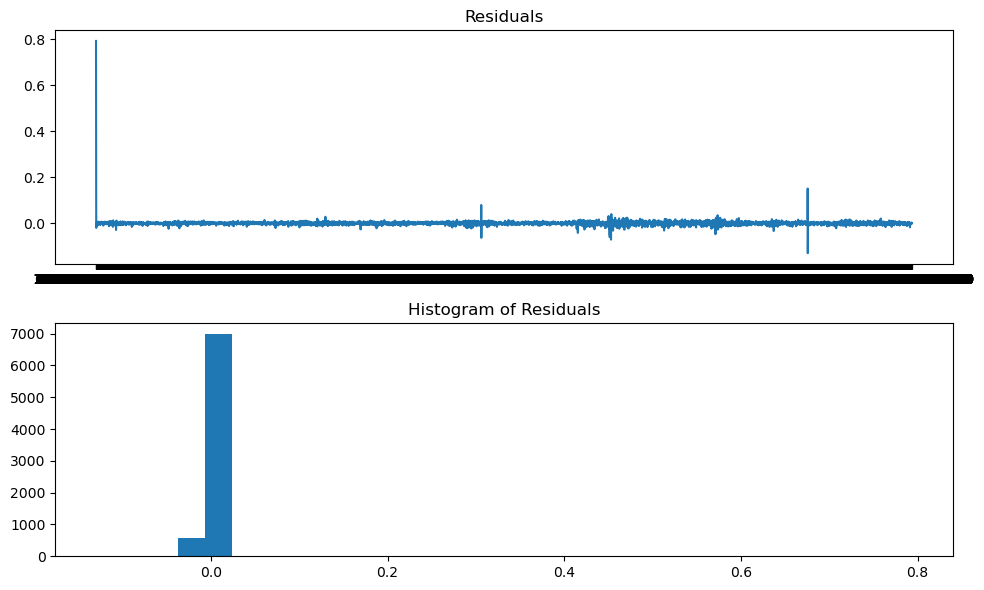

In [79]:
from statsmodels.tsa.arima.model import ARIMA

# Build the ARIMA model
model = ARIMA(df['Ex_rate'], order=(1, 1, 2))  # Try with q=2 or q=3 as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())



In [ ]:
#Residuals Plot (Top Panel):
#Observation:
#The residuals fluctuate around zero but show occasional large spikes.
#This suggests that while the model captures most of the time series dynamics, some observations may still deviate significantly from the expected values.
#Inference:
#Ideally, residuals should behave like white noise (random and with no discernible pattern).
#The spikes indicate that there might still be unexplained variance or some structure left in the residuals.
#2)Histogram of Residuals (Bottom Panel):
#Observation:
#The histogram shows a sharp peak concentrated around zero with very few residuals in other bins.
#This indicates that the majority of the residuals are small, but the distribution appears to be highly skewed or non-normal.
#Inference:
#Non-normality in residuals is problematic, as ARIMA models typically assume normally distributed residuals.


In [ ]:
#Key Metrics:
#Model Summary:
#Model: ARIMA(1, 1, 2)
#This means:
#AR term (p) = 1
#Differencing (d) = 1 (stationary data)
#MA term (q) = 2
#Log Likelihood: 28005.622
#A higher value is better, as it indicates a better fit to the data.
#Information Criteria:
#AIC (-56003.244): Akaike Information Criterion; lower values are better.
#BIC (-55975.514): Bayesian Information Criterion; lower values are better.
#HQIC (-55993.726): Hannan-Quinn Information Criterion; lower values are better.
#Since all criteria are negative and low, this model appears to fit well.

In [ ]:
#Parameter Estimates:
#ar.L1 = -0.5730
#The coefficient for the AR(1) term.
#It is significant at the 10% level (p-value = 0.074) but not at the 5% level.
#ma.L1 = 0.4403
#The coefficient for the MA(1) term.
#It is not statistically significant (p-value = 0.170).
#ma.L2 = -0.0613
#The coefficient for the MA(2) term.
#It is also not statistically significant (p-value = 0.179).
#sigma2 = 3.594e-05
#The variance of the residuals, which is very small. This suggests a good fit.

In [ ]:
#Model Diagnostics:
#Ljung-Box Test (L1):
#Q-statistic = 0.01, Prob(Q) = 0.91
#A high p-value (0.91) suggests that the residuals are uncorrelated, indicating a good model fit.
#Jarque-Bera Test:
#JB = 2842375.48, Prob(JB) = 0.00
#A very low p-value indicates that the residuals are not normally distributed. However, this is common with financial or economic time series.
#Heteroskedasticity (H):
#H = 2.95, Prob(H) = 0.00
#Indicates heteroskedasticity (non-constant variance in residuals). This might affect the confidence intervals of your forecasts.
#Skewness and Kurtosis:
#Skew = 0.25: Slightly skewed to the right.
#Kurtosis = 97.90: Highly peaked distribution, suggesting extreme values.

In [81]:
forecast = model_fit.forecast(steps=30)  # Forecast for the next 30 steps
print(forecast)


2010-10-11    0.720831
2010-10-12    0.720845
2010-10-13    0.720837
2010-10-14    0.720842
2010-10-15    0.720839
2010-10-16    0.720840
2010-10-17    0.720840
2010-10-18    0.720840
2010-10-19    0.720840
2010-10-20    0.720840
2010-10-21    0.720840
2010-10-22    0.720840
2010-10-23    0.720840
2010-10-24    0.720840
2010-10-25    0.720840
2010-10-26    0.720840
2010-10-27    0.720840
2010-10-28    0.720840
2010-10-29    0.720840
2010-10-30    0.720840
2010-10-31    0.720840
2010-11-01    0.720840
2010-11-02    0.720840
2010-11-03    0.720840
2010-11-04    0.720840
2010-11-05    0.720840
2010-11-06    0.720840
2010-11-07    0.720840
2010-11-08    0.720840
2010-11-09    0.720840
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
#The model has successfully produced predictions that align with a stable time series, suggesting no unexpected volatility in the forecasted horizon.
#Conclusion:
#The predicted values reflect a highly stable system or model simplification. While this may be acceptable for stationary or low-variance data,
#further investigation into data patterns and residuals is recommended to validate the model's adequacy for the specific context.
#observations
#After the initial forecast, the values become completely constant, suggesting no changes or trends in the predicted time series.
#The predictions start with slight variations (e.g., 0.720831, 0.720845) but quickly stabilize at 0.720840 for the remaining dates.

In [ ]:
#Model Behavior:
#This behavior is typical of time series models (like ARIMA) when the series lacks strong seasonality, trend, or fluctuations during the forecast horizon.
#The ARIMA model assumes the time series reaches a steady state, so if the data itself does not exhibit much variation, 
#the model produces constant predictions.
#Stationarity Assumption:
#If the input data was already stationary or made stationary, the model might converge to a mean value over time.
#This aligns with the lack of changes in predicted values.
#Data Dynamics:
#The original time series might lack significant patterns, trends, or external factors influencing future values, leading to predictions that remain flat.
#


In [ ]:
#Potential Concerns:
#Lack of Variability:
#If the actual data showed fluctuations, this constant prediction might indicate that the model has over-simplified the dynamics.
#The predictions may not capture seasonal or external effects.
#Real-World Applicability:
#If the context (e.g., exchange rate) typically shows dynamic changes, this output may not be reliable for decision-making.